In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify 
import treeplot

/Users/tmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("../datasets/marbles.csv")

In [3]:
df.head()

,date,race,site,source,marble_name,team_name,time_s,pole,points,track_length_m,number_laps,avg_time_lap,host,notes
0,15-Feb-20,S1Q1,Savage Speedway,https://youtu.be/JtsQ_UydjEI?t=356,Clementin,O'rangers,28.11,P1,NaN,12.81,1,28.11,No,NaN
1,15-Feb-20,S1Q1,Savage Speedway,https://youtu.be/JtsQ_UydjEI?t=356,Starry,Team Galactic,28.37,P2,NaN,12.81,1,28.37,No,NaN
2,15-Feb-20,S1Q1,Savage Speedway,https://youtu.be/JtsQ_UydjEI?t=356,Momo,Team Momo,28.40,P3,NaN,12.81,1,28.40,No,NaN
3,15-Feb-20,S1Q1,Savage Speedway,https://youtu.be/JtsQ_UydjEI?t=356,Yellow,Mellow Yellow,28.70,P4,NaN,12.81,1,28.70,No,NaN
4,15-Feb-20,S1Q1,Savage Speedway,https://youtu.be/JtsQ_UydjEI?t=356,Snowy,Snowballs,28.71,P5,NaN,12.81,1,28.71,No,NaN


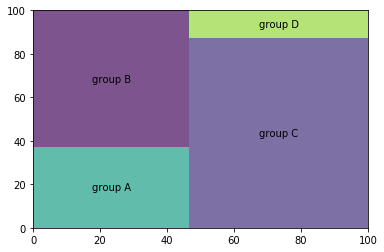

In [4]:
squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 ) 

In [5]:
labels = list(dict.fromkeys(df["team_name"]))

In [6]:
def getAvgSpeed(length,time):
    return length/time

def getAvgSpeedList(df):
    ret = []
    for i,row in df.iterrows():
        ret.append(getAvgSpeed(df["time_s"][i],df["avg_time_lap"][i]))
    return ret

In [7]:
df_means = df.groupby("team_name").mean()
df_means

,time_s,points,track_length_m,number_laps,avg_time_lap
team_name,,,,,
Balls of Chaos,193.175000,5.750,13.2225,6.25,30.061875
Green Ducks,191.760000,8.000,13.2225,6.25,29.598125
Hazers,190.516875,11.750,13.2225,6.25,29.201250
Hornets,193.843125,1.000,13.2225,6.25,29.982500
Limers,184.694667,3.125,13.2225,6.25,30.245333
Mellow Yellow,192.246250,5.500,13.2225,6.25,29.370000
Midnight Wisps,183.458667,4.250,13.2225,6.25,29.068667
O'rangers,191.639375,8.625,13.2225,6.25,29.396250
Raspberry Racers,192.618125,3.375,13.2225,6.25,29.734375


In [8]:
df_means["avg_speed"] = getAvgSpeedList(df_means)

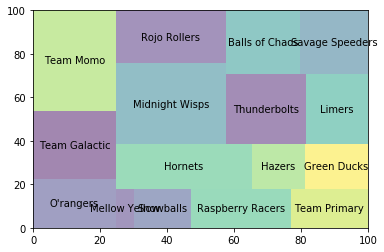

In [9]:
squarify.plot(sizes=df_means["points"], label=labels, alpha=.5 ) 